In [12]:
from PIL import Image, ImageFilter
import numpy as np

In [13]:
image = Image.open("images\\kucing.jpg")
image_pixel = image.load()

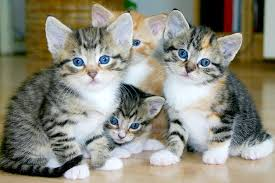

In [14]:
image

In [15]:
height = image.size[1]
width = image.size[0]

In [16]:
grayscale = Image.new(mode="RGB", size=(width, height))
grayscale_pixel = grayscale.load()

In [17]:
for x in range(0, width):
    for y in range(0, height):
        red = image_pixel[x,y][0]
        green = image_pixel[x,y][1]
        blue = image_pixel[x,y][2]
        gray = int((red+green+blue)/3)
        grayscale_pixel[x,y] = (gray, gray, gray)

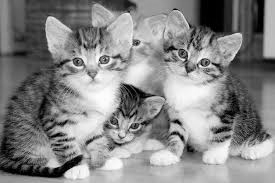

In [18]:
grayscale

In [19]:
gray_np = np.array(grayscale, dtype=np.float32)

In [20]:
print(gray_np)

[[[131. 131. 131.]
  [131. 131. 131.]
  [132. 132. 132.]
  ...
  [185. 185. 185.]
  [185. 185. 185.]
  [185. 185. 185.]]

 [[131. 131. 131.]
  [131. 131. 131.]
  [132. 132. 132.]
  ...
  [185. 185. 185.]
  [185. 185. 185.]
  [185. 185. 185.]]

 [[132. 132. 132.]
  [131. 131. 131.]
  [133. 133. 133.]
  ...
  [185. 185. 185.]
  [185. 185. 185.]
  [185. 185. 185.]]

 ...

 [[150. 150. 150.]
  [150. 150. 150.]
  [150. 150. 150.]
  ...
  [177. 177. 177.]
  [177. 177. 177.]
  [177. 177. 177.]]

 [[150. 150. 150.]
  [150. 150. 150.]
  [150. 150. 150.]
  ...
  [177. 177. 177.]
  [177. 177. 177.]
  [177. 177. 177.]]

 [[148. 148. 148.]
  [148. 148. 148.]
  [148. 148. 148.]
  ...
  [177. 177. 177.]
  [177. 177. 177.]
  [177. 177. 177.]]]


In [21]:
hpf_kernel = np.array([
    [-1, -1, -1],
    [-1, 8, -1],
    [-1, -1, -1]
])

In [23]:
output = np.zeros((height, width), dtype=np.float32)

In [24]:
for i in range(1, height-1):
    for j in range(1, width-1):
        region = gray_np[i-1:i+2, j-1:j+2]
        value = np.sum(region*hpf_kernel)
        output[i,j] = value

In [25]:
output = (output - output.min())/(output.max() - output.min())*255
output = output.astype(np.uint8)

In [26]:
hpf_image = Image.fromarray(output)

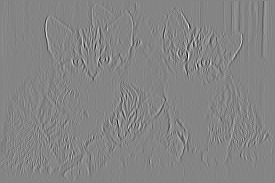

In [ ]:
hpf_image